In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score, auc,r2_score,mean_squared_error
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
import tkinter as tk
from tkinter import ttk, messagebox

df=pd.read_csv("D:/ammar college/Level 3/semester2/Advanced ML/bank.csv")

categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome','deposit']
# columnsss=df.drop(columns=['deposit']).columns.tolist()
# # columnsss=columnsss.to_list
# print(columnsss)
label_encoder = LabelEncoder()
keys_of_encoding={}
for i in categorical_cols:
    uniq =df[i].unique()
    labels= label_encoder.fit_transform(df[i].unique())
    keys_of_encoding[i]=dict(zip(uniq,labels))

for i in categorical_cols:
    df[i]=label_encoder.fit_transform(df[i])
    
X = df.drop(columns=['deposit'])  # Features
y = df['deposit']  #Target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

X_test=scaler.transform(X_test)

print("training size: ",X_train.shape)
print("test size: ",X_test.shape)

training size:  (7813, 16)
test size:  (3349, 16)


In [ ]:
##########Grid search for hyper parameters ##############
# Define the hyperparameters grid
# param_grid = {
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [ 10, 15, 20]
#     ,'min_samples_split': [ 20, 25, 30],
#     'max_features': [None,6,10,14]
# }

# # Initialize Decision Tree Classifier
# DTModel = DecisionTreeClassifier(random_state=42)

# # Perform Grid Search Cross Validation
# grid_search = GridSearchCV(DTModel, param_grid, cv=5, scoring='accuracy')
# grid_search.fit(features_train, target_train)

# # Get the best parameters
# best_params = grid_search.best_params_
# print("Best Parameters:", best_params)
# Evaluate the best model
# best_model = grid_search.best_estimator_
########################
Best_Parameters={'criterion': 'gini', 
                  'max_depth': 10, 
                  'max_features': None,
                  'min_samples_leaf': 5, 
                  'min_samples_split': 30}
DTModel = DecisionTreeClassifier(random_state=42,**Best_Parameters)

DTModel.fit(X_train, y_train)
target_prediction = DTModel.predict(X_test)
accuracy = accuracy_score(y_test, target_prediction)

print("Decision tree model accuracy: ",accuracy)


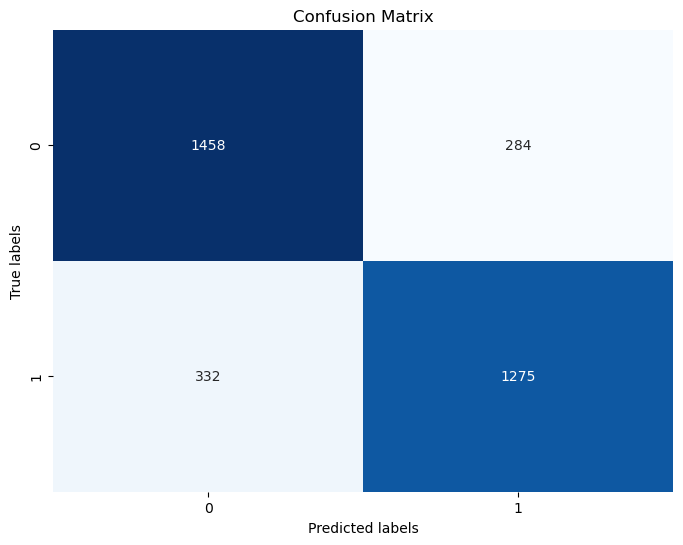

In [17]:
cm = confusion_matrix(y_test, target_prediction)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

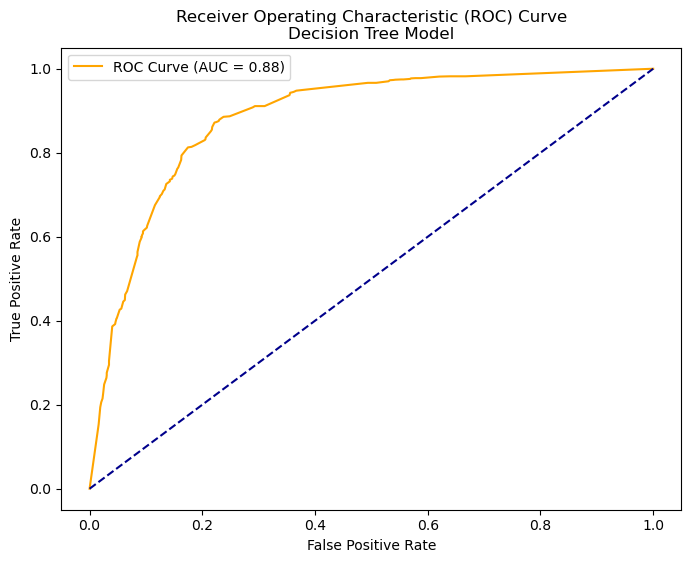

In [18]:
probs = DTModel.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
auc = roc_auc_score(y_test, probs)
# Plot ROC curve with AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label=f'ROC Curve (AUC = {auc:.2f})')  # Include AUC in label
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve\nDecision Tree Model')
plt.legend()
plt.show()

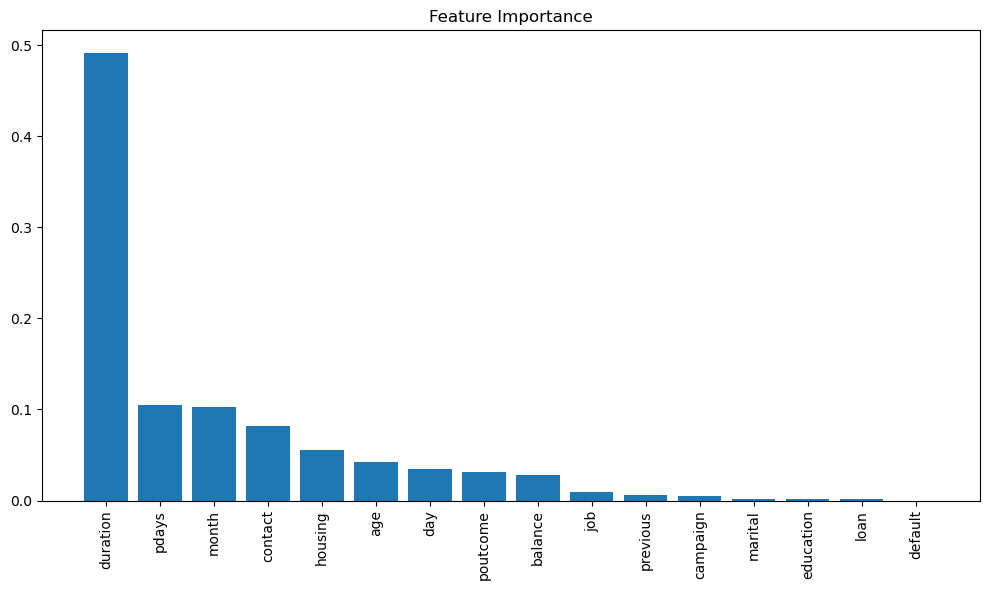

In [19]:
importances = DTModel.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()